In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

# ICR - Identifying Age-Related Conditions

### The competition data comprises over fifty anonymized health characteristics linked to three age-related conditions. Your goal is to predict whether a subject has or has not been diagnosed with one of these conditions -- a binary classification problem.

### AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.

### Evaluation is to be based on balanced logarithmic loss. 


In [2]:
data = pd.read_csv('E:\\Kaggle\\age related condition\\train.csv')

In [3]:
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,81015c6c3404,6.161666,18964.47278,210.557493,85.393581,8.138688,17.983770,0.032886,8.866914,6.767964,7259.05083,19.0674,1027.410669,344.644105,740.681903,1510.069965,536.221322,NaN,633.534408,50.082229,0.082386,2.195925,0.665475,46.868767,1.164087,7.03064,23.91632,416.264665,0.556686,0.314295,311.516100,65.77300,62.808096,0.005518,3.04325,16.287992,27.713628,6.360918,6845.912275,0.003042,A,NaN,110.708936,132.899616,NaN,0.296850,5676.738604,12.768108,0.173229,54.94862,NaN,31.636102,296.036174,12261.844150,49.586046,39.457052,21.978000,1
1,9230d1831db3,4.435374,4843.61790,1237.940805,630.518230,19.874760,11.250930,0.025578,12.950610,1463.693448,53060.59924,26.1294,810.149202,261.232005,513.832305,50092.459300,30.137289,4.103032,197.922520,200.967526,0.046566,1.820390,0.671625,43.088859,2.637126,7.03064,22.61652,809.924135,2.057562,0.128451,294.637605,110.40748,31.056024,0.005518,1.74307,14.715792,33.254940,1.019843,2358.251275,0.003042,A,77.337117,155.302095,46.188744,228.982656,0.296850,28756.668000,6.734129,0.173229,0.49706,1.313962,135.781294,363.134821,578.553354,43.256625,38.342090,21.978000,1
2,8b9d72eec14e,4.277273,7314.15234,85.200147,630.518230,59.390922,6.936597,0.025578,18.805168,4.649022,5287.36652,29.3073,173.328471,NaN,515.574417,257.432377,47.379605,0.340140,91.370200,4.731796,0.121788,1.050225,0.853425,68.437606,1.015128,7.03064,11.63806,292.239890,37.895013,0.204975,654.364530,76.09104,12.719936,0.303468,1.74307,6.032756,14.019378,5.284641,1233.916988,0.006084,B,44.720247,78.526968,89.830296,53.350080,4.161837,6862.199106,7.326777,110.342316,0.87580,0.975312,36.231290,93.993760,14702.798590,39.427716,74.479976,0.013500,0
3,5d694ba9aa16,3.068014,13743.65190,85.200147,152.685197,8.138688,38.270880,0.025578,23.626198,21.554876,6674.69419,21.8922,2447.810550,344.644105,4685.612866,3184.005531,45.872281,1.647773,129.591088,14.424983,0.054924,1.311190,1.634400,55.800717,1.257876,7.03064,29.11940,363.084580,0.238680,0.284232,298.453433,96.35612,61.197632,0.489687,1.74307,21.440316,13.916892,1.306044,5157.083688,0.146016,B,109.125159,101.639219,30.386532,192.323040,4.981143,14874.891610,12.652335,6.990007,3.61717,0.535067,35.012728,251.707162,10123.793590,69.154785,69.374556,0.200789,1
4,8353e4690948,2.995373,3570.98346,85.200147,41.121966,8.138688,11.109186,0.025578,3.396778,1.229900,9899.77779,22.2453,1004.821038,39.749695,1525.594094,257.432377,38.501099,0.919928,113.996712,3.719143,0.032636,1.113875,0.585975,56.709081,0.882720,7.03064,57.40460,371.333680,0.238680,0.251436,76.211130,65.22392,21.611608,0.572451,1.74307,12.802200,12.764808,3.877822,1922.866700,0.249444,B,13.514358,78.526968,39.276384,346.004400,4.322136,6173.135264,13.291843,3.838701,0.99876,0.799214,29.096656,152.483674,5820.761736,34.828560,96.069344,0.293422,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

### there seems to be some missing values, let's explore

In [6]:
missing_features = data.isnull().sum()

print('Features with Missing values are - ')

for feature, count in missing_features.items():
    if count>0:
        print(feature, (count/len(data)*100))

Features with Missing values are - 
BQ 9.724473257698541
CB 0.3241491085899514
CC 0.48622366288492713
DU 0.1620745542949757
EL 9.724473257698541
FC 0.1620745542949757
FL 0.1620745542949757
FS 0.3241491085899514
GL 0.1620745542949757


### we can observe that only 2 variables (BQ and EL) have considerable missing values
### let's first impute missing values of other features then explore BQ and EL

In [8]:
list_1 = ['CB', 'CC', 'DU', 'FC', 'FL', 'FS', 'GL']

for i in list_1:
    print(f"Mean of {i}: {data[i].mean()}")
    print(f"Median of {i}: {data[i].median()}")

Mean of CB: 77.10415084878048
Median of CB: 42.55433
Mean of CC: 0.6888014997068403
Median of CC: 0.6587154900000001
Mean of DU: 1.802900432142857
Median of DU: 0.25174050000000003
Mean of FC: 71.34152618181818
Median of FC: 36.394008
Mean of FL: 5.433198835689935
Median of FL: 3.0281409595
Mean of FS: 0.42150086016260163
Median of FS: 0.250601
Mean of GL: 8.530960818952924
Median of GL: 0.33782749300000003


In [9]:
data[list_1].describe()

,CB,CC,DU,FC,FL,FS,GL
count,615.000000,614.000000,616.000000,616.000000,616.000000,615.000000,616.000000
mean,77.104151,0.688801,1.802900,71.341526,5.433199,0.421501,8.530961
std,159.049302,0.263994,9.034721,165.551545,11.496257,1.305365,10.327010
min,12.499760,0.176874,0.005518,7.534128,0.173229,0.067730,0.001129
25%,23.317567,0.563688,0.005518,25.815384,0.173229,0.067730,0.124392
50%,42.554330,0.658715,0.251741,36.394008,3.028141,0.250601,0.337827
75%,77.310097,0.772206,1.058690,56.714448,6.238814,0.535067,21.978000
max,2271.436167,4.103032,161.355315,3030.655824,137.932739,31.365763,21.978000


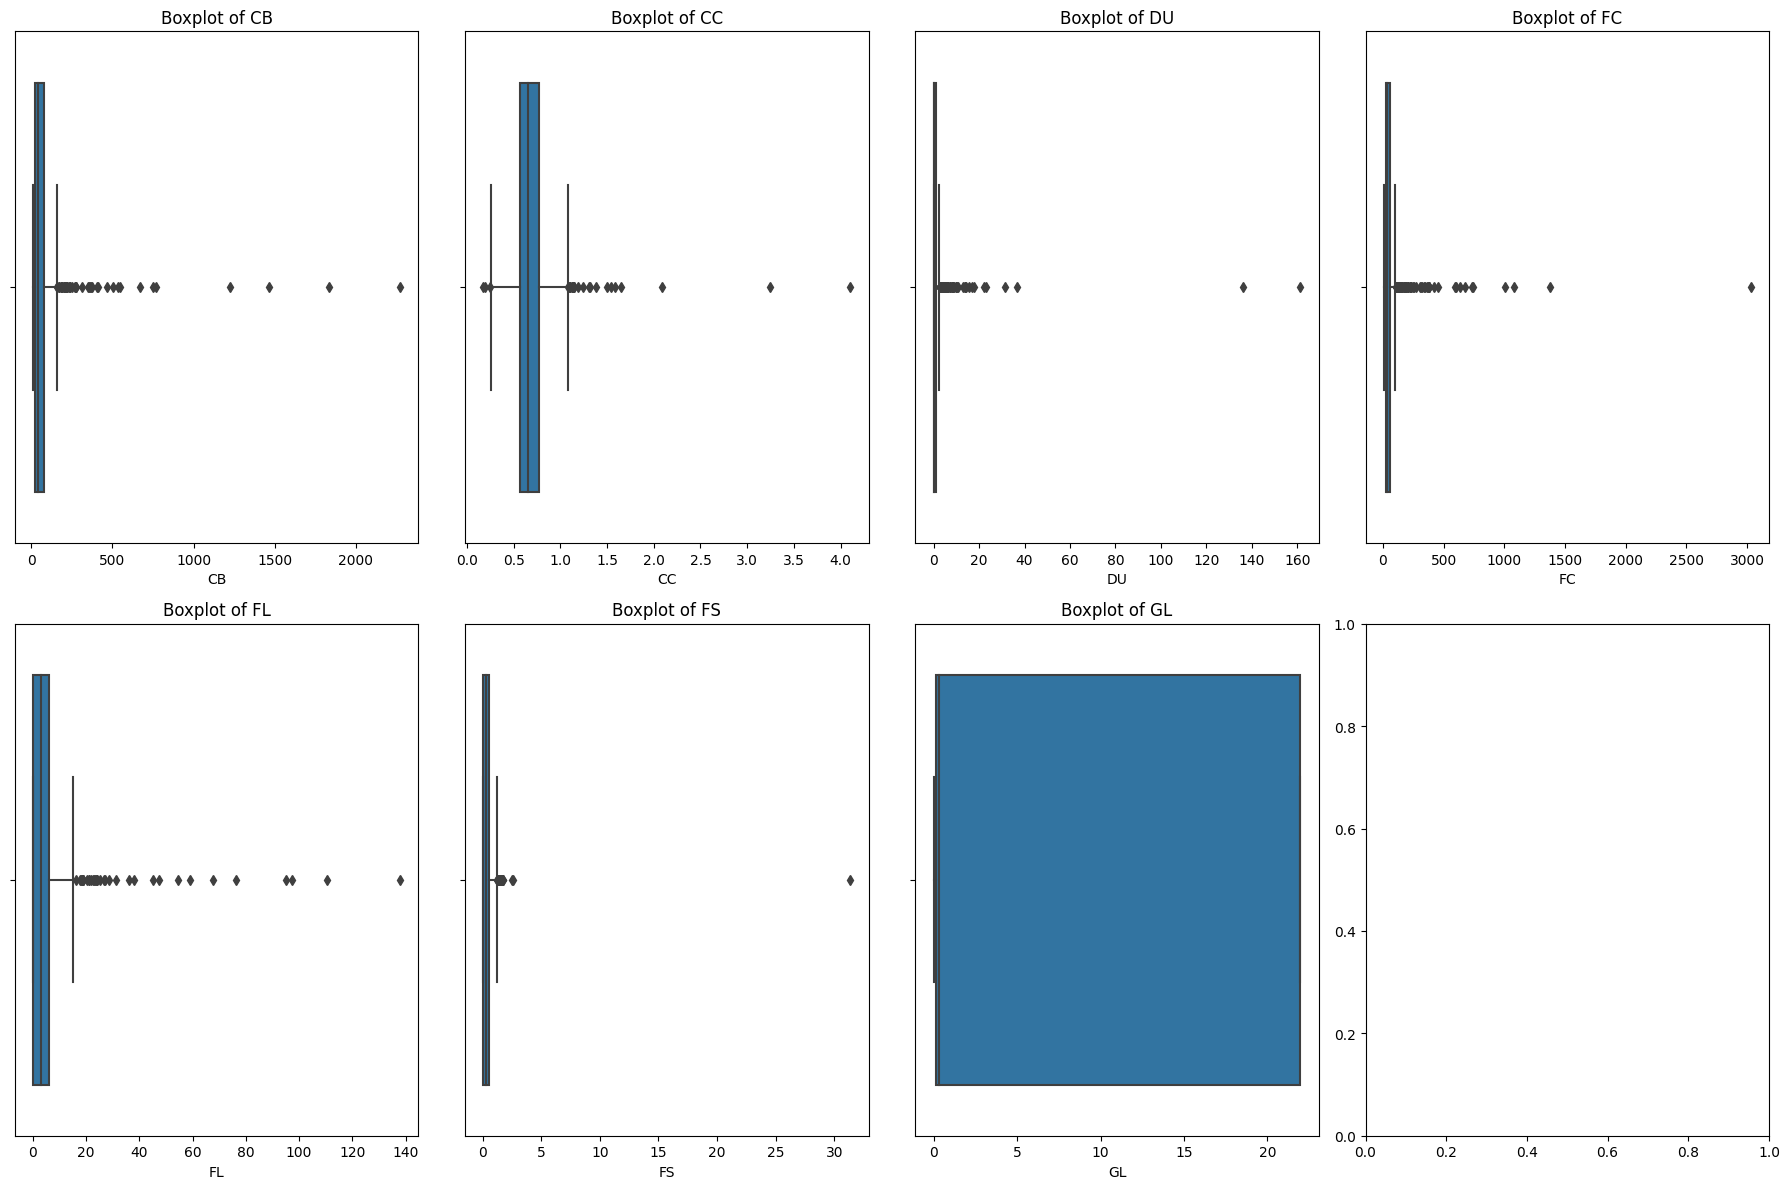

In [10]:
num_plots = len(list_1)
num_rows = int(num_plots / 3)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(18, 12))

for i, ax in zip(list_1, axes.flatten()):
    sns.boxplot(data=data, x=i, ax=ax)
    ax.set_title(f"Boxplot of {i}")



plt.tight_layout()
plt.show()

### from the above 3 codes, we can observe that there are outliers in all these features except GL, let's impute all of them with Median

In [12]:
for i in list_1:
    median_value = data[i].median()
    data[i].fillna(median_value, inplace=True)

## Now, let's check how the missing values of other two features are related with the target variable

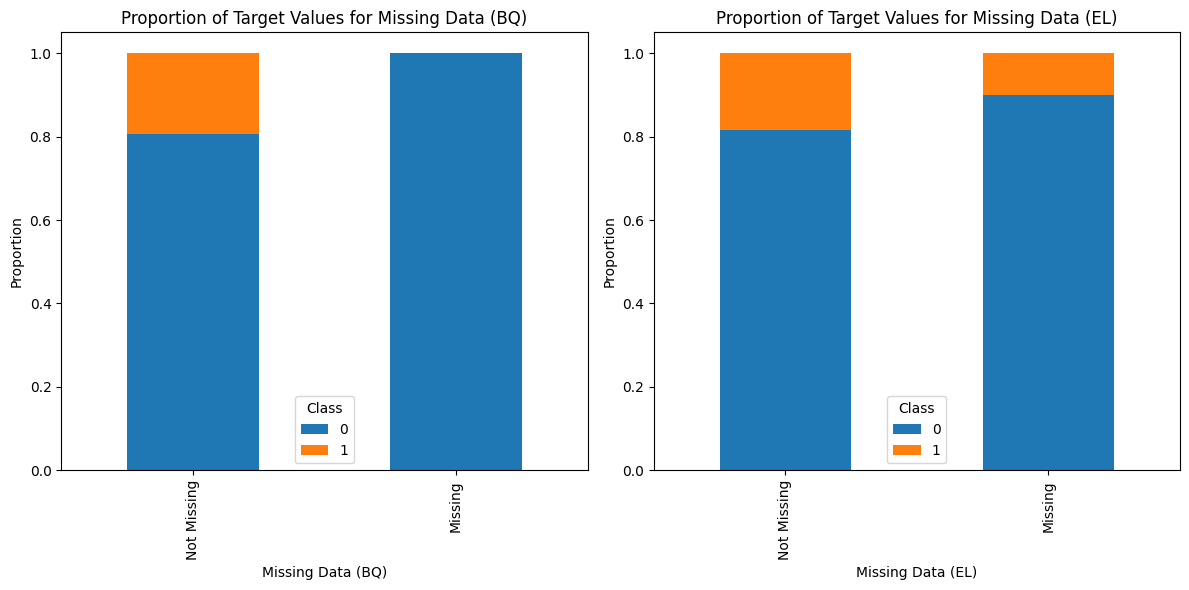

In [14]:
df = data[['BQ', 'EL', 'Class']].copy()

# Creating a new column indicating whether the variable 'BQ' is missing or not
df['BQ_Missing'] = df['BQ'].isnull()

# Creating a new column indicating whether the variable 'EL' is missing or not
df['EL_Missing'] = df['EL'].isnull()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting bar plot for 'BQ'
axes[0].set_title('Proportion of Target Values for Missing Data (BQ)')
df.groupby('BQ_Missing')['Class'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Missing Data (BQ)')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Class')
axes[0].set_xticks([False, True])
axes[0].set_xticklabels(['Not Missing', 'Missing'])

# Plotting bar plot for 'EL'
axes[1].set_title('Proportion of Target Values for Missing Data (EL)')
df.groupby('EL_Missing')['Class'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Missing Data (EL)')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Class')
axes[1].set_xticks([False, True])
axes[1].set_xticklabels(['Not Missing', 'Missing'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Insight = Whenever there is a missing value in BQ, the class is always 0. Not the same for EL

In [15]:
df.columns[:2]

Index(['BQ', 'EL'], dtype='object')

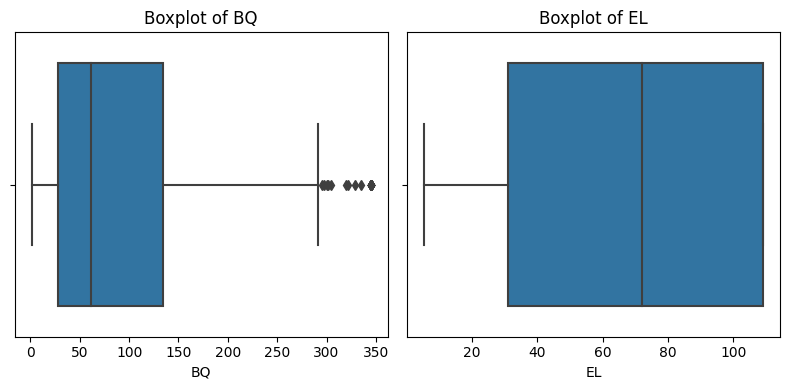

In [16]:
  
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot boxplot for 'BQ'
sns.boxplot(data=df, x='BQ', ax=axes[0])
axes[0].set_title("Boxplot of BQ")

# Plot boxplot for 'EL'
sns.boxplot(data=df, x='EL', ax=axes[1])
axes[1].set_title("Boxplot of EL")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
data = data.fillna(data['BQ'].median())
data = data.fillna(data['EL'].mean())

### We have imputed all missing values, however in the process we have also observed that most features have outliers, 
### we can also move forward to plot boxplots of all features to check the presence of outliers in all features
### but before that let's remove the Id column, seems we have forgotten to do that

In [19]:
data2 = data.drop(columns=['Id'])

In [20]:
data2.shape

(617, 57)

In [21]:
len(data2.columns[0:-1])

56

## Boxplots of all columns to check outliers and their distribution

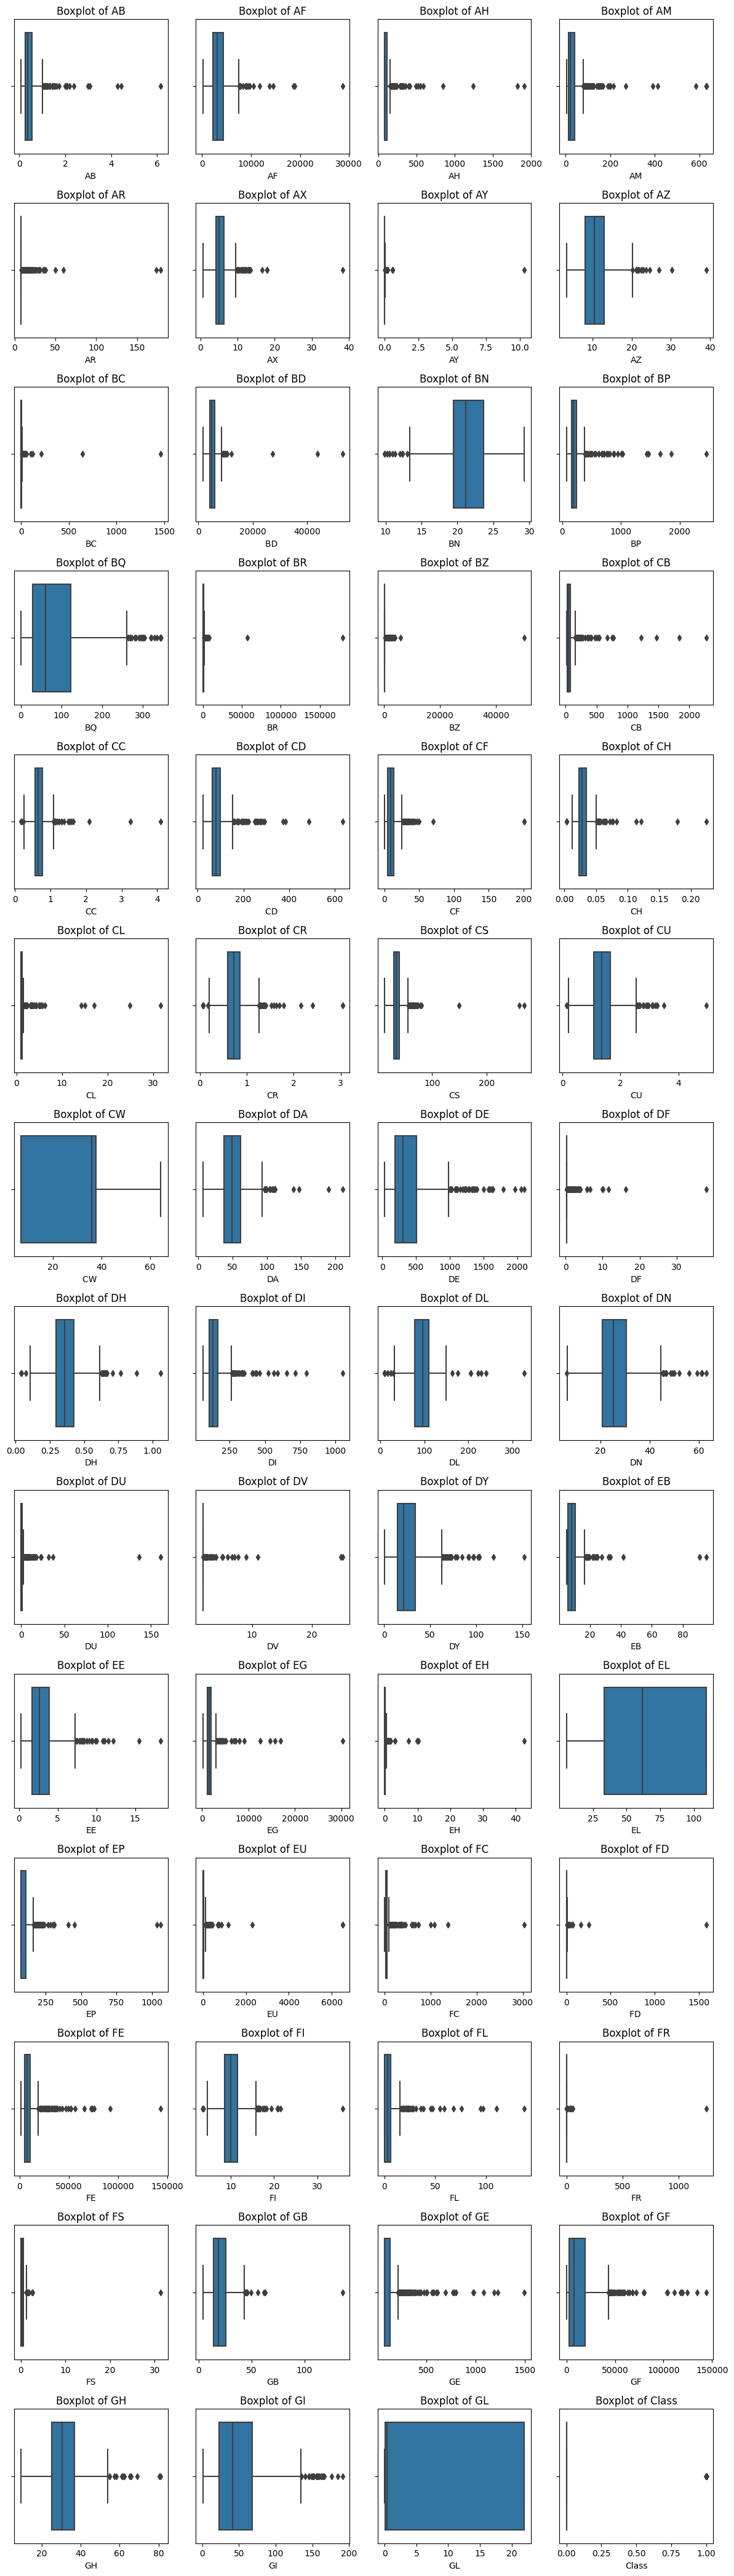

In [22]:
numeric_columns = data2.select_dtypes(include='number').columns

num_cols = min(4, len(numeric_columns))  # Adjust the number of columns dynamically
num_rows = len(numeric_columns) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 3))

for i, ax in zip(numeric_columns, axes.flatten()):
    sns.boxplot(data=data2, x=i, ax=ax)
    ax.set_title(f"Boxplot of {i}")

# Remove empty subplots
if len(numeric_columns) % num_cols != 0:
    for j in range(len(numeric_columns) % num_cols, num_cols):
        fig.delaxes(axes.flatten()[-j-1])

plt.tight_layout()
plt.show()


### we can observe that most features are skewed to right, and only 1 feature is skewed to left which is BN, No other feature only possess negative outliers

In [24]:
columns_without_outliers = ['GL', 'EL', 'CW']

columns_with_outliers = []

for i in data2.columns[0:-1]:
    if i not in columns_without_outliers:
        columns_with_outliers.append(i)


### let's check if outliers have an impact on target variable or not, but before that let's check the distribution of the target variable

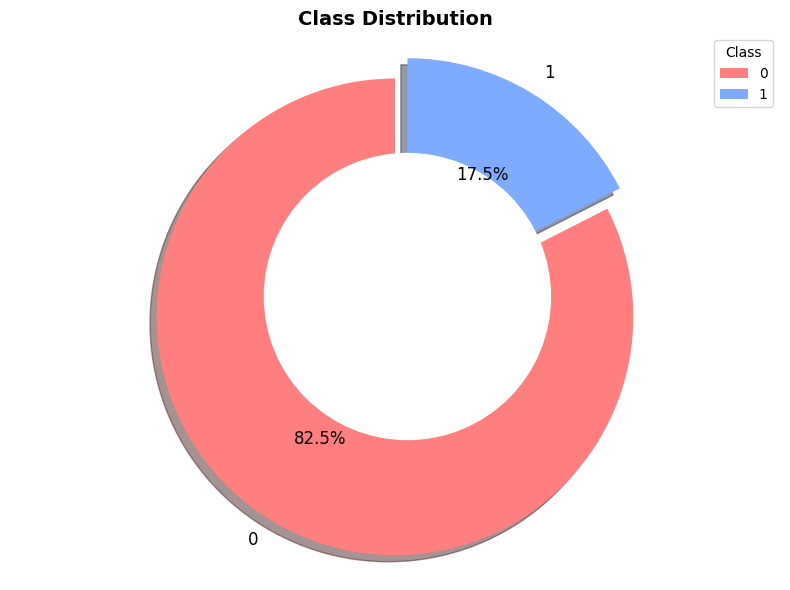

In [26]:
class_counts = data2['Class'].value_counts()
labels = class_counts.index
sizes = class_counts.values

# Define custom colors for the pie slices
colors = ['#FF7F7F', '#7FABFF']

# Define explode values to create a separated effect for the slices
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

# Add a circle at the center to create a donut chart effect
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# Add a legend with custom labels and title
plt.legend(labels, title='Class', loc='best')

# Set aspect ratio to 'equal' and remove the x and y axis labels
plt.axis('equal')
plt.xticks([])
plt.yticks([])

# Add a title and adjust the layout
plt.title("Class Distribution", fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()


In [27]:
# let's also encode the categorical variable EJ before moving forward

In [28]:
data2 = data2.replace('A', 0)
data2 = data2.replace('B', 1)

## Checking how outliers are related to the target variable

In [29]:
# Step 1: Identify outliers
def detect_outliers(series, threshold=3):
    z_scores = (series - series.mean()) / series.std()
    return np.abs(z_scores) > threshold

# Step 2: Find rows with outliers
def mark_outlier_rows(dataframe, column_names, threshold=3):
    outlier_columns = []
    for column in column_names:
        outlier_column = f"{column}_outlier"
        dataframe[outlier_column] = detect_outliers(dataframe[column], threshold)
        outlier_columns.append(outlier_column)
    return outlier_columns

# Step 3: Check for rows with outliers in multiple columns
def mark_rows_with_multiple_outliers(dataframe, outlier_columns):
    dataframe['has_multiple_outliers'] = dataframe[outlier_columns].sum(axis=1) > 1

# Step 4: Analyze the relationship with the target variable
def analyze_outlier_relationship(dataframe, target_column):
    target_distribution = dataframe.groupby('has_multiple_outliers')[target_column].value_counts(normalize=True)
    print(target_distribution)



In [30]:
# Set the threshold for identifying outliers
outlier_threshold = 3

# Step 1: Identify outliers
outlier_columns = mark_outlier_rows(data2, columns_with_outliers, outlier_threshold)

# Step 2: Find rows with outliers
mark_rows_with_multiple_outliers(data2, outlier_columns)

# Step 4: Analyze the relationship with the target variable
target_column = 'Class'
analyze_outlier_relationship(data2, target_column)

has_multiple_outliers  Class
False                  0        0.852518
                       1        0.147482
True                   0        0.573770
                       1        0.426230
Name: proportion, dtype: float64


In [31]:
target_distribution = data2.groupby('has_multiple_outliers')['Class'].value_counts(normalize=True)

<Figure size 800x600 with 0 Axes>

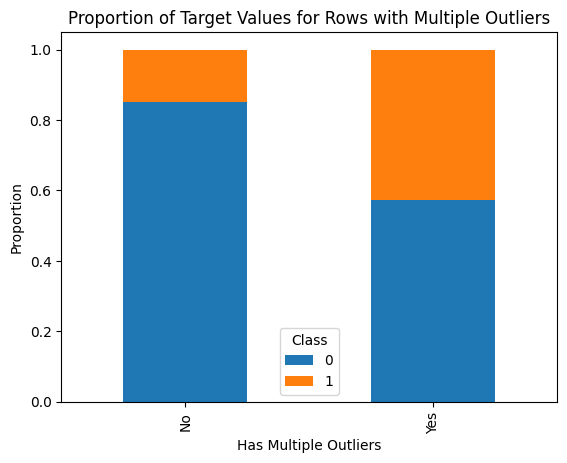

In [32]:
plt.figure(figsize=(8, 6))
target_distribution.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Has Multiple Outliers')
plt.ylabel('Proportion')
plt.title('Proportion of Target Values for Rows with Multiple Outliers')
plt.legend(title=target_column)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



# Insight - when outlier is only present in one column, it does not affect the target variable, However, if the row has outliers in more than 1 column, the proporting of Class 1 increases drastically.

# This additional feature is added to our model

In [33]:
data2.head(1)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,AB_outlier,AF_outlier,AH_outlier,AM_outlier,AR_outlier,AX_outlier,AY_outlier,AZ_outlier,BC_outlier,BD _outlier,BN_outlier,BP_outlier,BQ_outlier,BR_outlier,BZ_outlier,CB_outlier,CC_outlier,CD _outlier,CF_outlier,CH_outlier,CL_outlier,CR_outlier,CS_outlier,CU_outlier,CW _outlier,DA_outlier,DE_outlier,DF_outlier,DH_outlier,DI_outlier,DL_outlier,DN_outlier,DU_outlier,DV_outlier,DY_outlier,EB_outlier,EE_outlier,EG_outlier,EH_outlier,EJ_outlier,EP_outlier,EU_outlier,FC_outlier,FD _outlier,FE_outlier,FI_outlier,FL_outlier,FR_outlier,FS_outlier,GB_outlier,GE_outlier,GF_outlier,GH_outlier,GI_outlier,has_multiple_outliers
0,6.161666,18964.47278,210.557493,85.393581,8.138688,17.98377,0.032886,8.866914,6.767964,7259.05083,19.0674,1027.410669,344.644105,740.681903,1510.069965,536.221322,0.658715,633.534408,50.082229,0.082386,2.195925,0.665475,46.868767,1.164087,7.03064,23.91632,416.264665,0.556686,0.314295,311.5161,65.773,62.808096,0.005518,3.04325,16.287992,27.713628,6.360918,6845.912275,0.003042,0,61.642115,110.708936,132.899616,36.394008,0.29685,5676.738604,12.768108,0.173229,54.94862,0.250601,31.636102,296.036174,12261.84415,49.586046,39.457052,21.978,1,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [34]:
data2 = data2.rename(columns={'has_multiple_outliers': 'O1'})

In [35]:
for i in data2.columns:
    if 'outlier' in i:
        data2.drop(columns=[i], inplace=True)

In [36]:
data2.head(1)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,O1
0,6.161666,18964.47278,210.557493,85.393581,8.138688,17.98377,0.032886,8.866914,6.767964,7259.05083,19.0674,1027.410669,344.644105,740.681903,1510.069965,536.221322,0.658715,633.534408,50.082229,0.082386,2.195925,0.665475,46.868767,1.164087,7.03064,23.91632,416.264665,0.556686,0.314295,311.5161,65.773,62.808096,0.005518,3.04325,16.287992,27.713628,6.360918,6845.912275,0.003042,0,61.642115,110.708936,132.899616,36.394008,0.29685,5676.738604,12.768108,0.173229,54.94862,0.250601,31.636102,296.036174,12261.84415,49.586046,39.457052,21.978,1,True


In [37]:
data2 = data2.replace(True, 1)
data2 = data2.replace(False,0)


# After realising that if rows have outliers in more than 1 column, then the proportion of class 1 increases, we can treat the outliers for a better result. Let's use the Log transformation approach

In [38]:
columns_to_transform = data2[columns_with_outliers]


In [39]:
data2[columns_to_transform.columns] = np.log1p(columns_to_transform)

### Let's divide our data into set of independent features and dependent feature

In [40]:
x = data2.drop(columns=['Class'])
y = data2['Class']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()

In [43]:
x_train_std = scaled.fit_transform(x_train)
x_test_std = scaled.transform(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Let's also define our balanced log loss functions, here two approaches are used

In [45]:
def balanced_log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    nc = np.bincount(y_true)
    w0, w1 = 1/(nc[0]/y_true.shape[0]), 1/(nc[1]/y_true.shape[0])
    balanced_log_loss_score = (-w0/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(1-y_pred))) - 
                               w1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred)))) / (w0+w1)
    return balanced_log_loss_score

In [46]:
def balanced_log_loss2(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    y_pred / np.sum(y_pred, axis=1)[:, None]
    nc = np.bincount(y_true)
    
    logloss = (-1/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(y_pred[:,0]))) - 1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred[:,1])))) / 2
    
    return logloss

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg_model = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

In [49]:
log_reg_model.fit(x_train_std, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [50]:
y_pred_train = log_reg_model.predict(x_train_std)
y_pred_test = log_reg_model.predict(x_test_std)

In [51]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       102
           1       0.66      0.95      0.78        22

    accuracy                           0.90       124
   macro avg       0.82      0.92      0.86       124
weighted avg       0.93      0.90      0.91       124



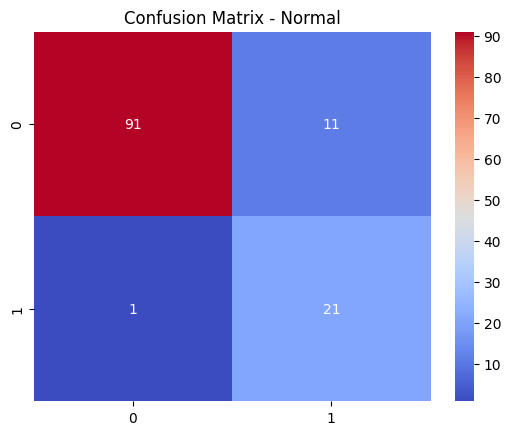

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix - Normal')
plt.show()

In [53]:
y_pred_prob = log_reg_model.predict_proba(x_test_std)

In [54]:
print(balanced_log_loss(y_test, y_pred_prob[:,1]))
print('*****'*5)
print(balanced_log_loss2(y_test, y_pred_prob))

0.19358494405326823
*************************
0.23366707996998848


# Cross Validation

In [55]:
from sklearn.model_selection import KFold

k = 20


# Reset the index of y_train to align it with x_train_std
y_train.reset_index(drop=True, inplace=True)

# Create a Logistic Regression classifier instance
lr = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

# Perform k-fold cross-validation
kf = KFold(n_splits=k)

cv_scores = []

for train_index, val_index in kf.split(x_train_std, y_train):
    X_train, X_val = x_train_std[train_index], x_train_std[val_index]
    y_train_fold, y_val = y_train[train_index], y_train[val_index]

    # Fit the model on the training data
    lr.fit(X_train, y_train_fold)

    # Evaluate the model on the validation set
    score = lr.score(X_val, y_val)
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", sum(cv_scores) / k)
print("Standard Deviation of CV Scores:", np.std(cv_scores))

# Make predictions on the test set
y_pred = lr.predict(x_test_std)

# Make probability predictions on the test set
y_prob = lr.predict_proba(x_test_std)


Cross-Validation Scores: [0.88, 0.92, 0.88, 0.76, 0.88, 0.96, 0.88, 0.92, 0.88, 0.96, 0.84, 1.0, 0.88, 0.8333333333333334, 0.875, 0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.9583333333333334, 0.7083333333333334]
Mean CV Score: 0.8924166666666666
Standard Deviation of CV Scores: 0.06882642217120463


## Cross Validated Score

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       102
           1       0.65      1.00      0.79        22

    accuracy                           0.90       124
   macro avg       0.82      0.94      0.86       124
weighted avg       0.94      0.90      0.91       124



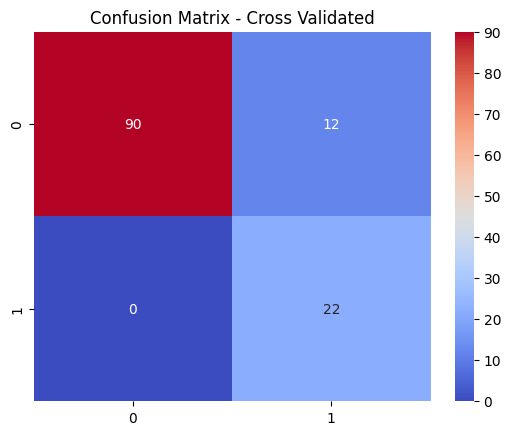

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', cmap='coolwarm', annot=True)
plt.title('Confusion Matrix - Cross Validated')
plt.show()

In [60]:
print(balanced_log_loss(y_test, y_prob[:,1]))
print('*****'*5)
print(balanced_log_loss2(y_test, y_prob))

0.1858009836596216
*************************
0.23437111924629464


# XGBoost

In [61]:
import xgboost as xgb

In [66]:
xgb_classifier = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=14,
                                   objective="binary:logistic", eval_metric= 'logloss', scale_pos_weight=5)

In [67]:
xgb_classifier.fit(x_train_std, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [68]:
x_pred = xgb_classifier.predict(x_test_std)

In [69]:
print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.95      0.86      0.90        22

    accuracy                           0.97       124
   macro avg       0.96      0.93      0.94       124
weighted avg       0.97      0.97      0.97       124



In [70]:
x_prob = xgb_classifier.predict_proba(x_test_std)

In [71]:
print(balanced_log_loss(y_test, x_prob[:,1]))
print('*****'*5)
print(balanced_log_loss2(y_test, x_prob))

0.21650914639602853
*************************
0.15541401016243875


## XGBOOST Cross Validation

In [72]:
k = 20

# Reset the index of y_train to align it with x_train_std
y_train.reset_index(drop=True, inplace=True)

# Create a Logistic Regression classifier instance
xgb_new = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=14,
                            objective="binary:logistic", eval_metric='logloss', scale_pos_weight=5)

# Perform k-fold cross-validation
kf = KFold(n_splits=k)

cv_scores = []

for train_index, val_index in kf.split(x_train_std, y_train):
    X_train, X_val = x_train_std[train_index], x_train_std[val_index]
    y_train_fold, y_val = y_train[train_index], y_train[val_index]

    # Fit the model on the training data
    xgb_new.fit(X_train, y_train_fold)

    # Evaluate the model on the validation set
    score = xgb_new.score(X_val, y_val)
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", sum(cv_scores) / k)
print("Standard Deviation of CV Scores:", np.std(cv_scores))

# Make predictions on the test set
xgb_pred = xgb_new.predict(x_test_std)

# Make probability predictions on the test set
xgb_prob = xgb_new.predict_proba(x_test_std)


Cross-Validation Scores: [0.88, 0.92, 0.92, 0.88, 0.84, 0.96, 0.84, 0.96, 0.88, 0.92, 0.92, 1.0, 0.96, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9583333333333334, 0.9583333333333334, 1.0, 0.75]
Mean CV Score: 0.9189999999999999
Standard Deviation of CV Scores: 0.0605974880300789


### Cross Validated Score

In [73]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.91      0.91      0.91        22

    accuracy                           0.97       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.97      0.97      0.97       124



In [74]:
print(balanced_log_loss(y_test, xgb_prob[:,1]))
print('*******'*5)
print(balanced_log_loss2(y_test, xgb_prob))

0.23245211438222516
***********************************
0.16968929428710855


### We have tested our model and it seems to give us a good score. Now, we will again train these models on the complete data instead of doing train_test_split and use this model to predict for the test set

In [75]:
norm = MinMaxScaler()
norm_x = norm.fit_transform(x)

## Logistic Regression (full data)

In [76]:
lr2 = LogisticRegression(class_weight='balanced', solver='liblinear', 
                         penalty='l1')

In [77]:
lr2.fit(norm_x,y)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

## Cross Validated Logistic Regression (full data)

In [78]:
k = 20
lr3 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

# Perform k-fold cross-validation
kf = KFold(n_splits=k)

cv_scores = []

for train_index, val_index in kf.split(norm_x,y):
    X_train, X_val = norm_x[train_index], norm_x[val_index]
    y_train_fold, y_val = y[train_index], y[val_index]

    # Fit the model on the training data
    lr3.fit(X_train, y_train_fold)

    # Evaluate the model on the validation set
    score = lr3.score(X_val, y_val)
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", sum(cv_scores) / k)
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.7096774193548387, 0.7741935483870968, 0.7419354838709677, 0.967741935483871, 0.8709677419354839, 0.9032258064516129, 0.8064516129032258, 0.9354838709677419, 0.9032258064516129, 0.8709677419354839, 0.8709677419354839, 0.967741935483871, 0.9354838709677419, 0.8387096774193549, 0.8709677419354839, 1.0, 0.9354838709677419, 1.0, 1.0, 0.9333333333333333]
Mean CV Score: 0.8918279569892474
Standard Deviation of CV Scores: 0.0823605377601217


## Xgboost (full data)

In [79]:
booster = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=14,
                            objective="binary:logistic", eval_metric='logloss', scale_pos_weight=5)

In [80]:
booster.fit(norm_x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## Cross Validated XGboost (full data)

In [82]:
k = 20

booster_new = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=14,
                            objective="binary:logistic", eval_metric='logloss', scale_pos_weight=5)

# Perform k-fold cross-validation
kf = KFold(n_splits=k)

cv_scores = []

for train_index, val_index in kf.split(norm_x, y):
    X_train, X_val = norm_x[train_index], norm_x[val_index]
    y_train_fold, y_val = y[train_index], y[val_index]

    # Fit the model on the training data
    booster_new.fit(X_train, y_train_fold)

    # Evaluate the model on the validation set
    score = xgb_new.score(X_val, y_val)
    cv_scores.append(score)


# Let's load the TEST data

In [83]:
test = pd.read_csv('E:\\Kaggle\\age related condition\\test.csv')

## Necessary Pre processing steps to be performed on the test data

### Steps Include - 

### 1) dropping ID
### 2) Encoding EJ
### 3) filling missing values
### 4) Creating Outlier Column
### 5) Log transformation
### 6) Scaling

In [86]:
test2 = test.drop(columns=['Id'])

In [87]:
test2 = test2.replace('A', 0)

In [88]:
for i in test2.columns:
    if test2[i].isnull().sum()>=1:
        test2[i] = test2[i].fillna(test2[i].median())

In [89]:
outlier_columns = mark_outlier_rows(test2, columns_with_outliers, 3)
mark_rows_with_multiple_outliers(test2, outlier_columns)

In [90]:
columns_to_transform_2 = test2[columns_with_outliers]

In [91]:
test2[columns_to_transform_2.columns] = np.log1p(columns_to_transform_2)

In [92]:
test2 = test2.rename(columns={'has_multiple_outliers': 'O1'})

In [93]:
for i in test2.columns:
    if 'outlier' in i:
        test2.drop(columns=[i], inplace=True)

In [94]:
norm_test = norm.transform(test2)

# Now we can predict for test set using cross validated models that were trained on full dataset

In [95]:
booster_predictions = booster_new.predict_proba(norm_test)
lr_predictions = lr3.predict_proba(norm_test)

In [96]:
booster_predictions

array([[0.95411205, 0.04588792],
       [0.95411205, 0.04588792],
       [0.95411205, 0.04588792],
       [0.95411205, 0.04588792],
       [0.95411205, 0.04588792]], dtype=float32)

In [97]:
lr_predictions

array([[0.03040119, 0.96959881],
       [0.03040119, 0.96959881],
       [0.03040119, 0.96959881],
       [0.03040119, 0.96959881],
       [0.03040119, 0.96959881]])

## Let's strengthen our model by combining the results of both models

In [98]:
ensemble = (booster_predictions + lr_predictions)/2

In [99]:
ensemble

array([[0.49225662, 0.50774336],
       [0.49225662, 0.50774336],
       [0.49225662, 0.50774336],
       [0.49225662, 0.50774336],
       [0.49225662, 0.50774336]])

In [100]:
submission = pd.DataFrame({'Id': test['Id'],
                   'class_0': ensemble[:, 0],
                   'class_1': ensemble[:, 1]})

In [101]:
submission

,Id,class_0,class_1
0,00eed32682bb,0.492257,0.507743
1,010ebe33f668,0.492257,0.507743
2,02fa521e1838,0.492257,0.507743
3,040e15f562a2,0.492257,0.507743
4,046e85c7cc7f,0.492257,0.507743


In [102]:
submission.to_csv('submission.csv', index=False)